# Introducing Scikit-Learn
## Data Representation in Scikit-Learn
### Data as a table
Rows are called elements or samples. Columns are called features.

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head() # only first five data points

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


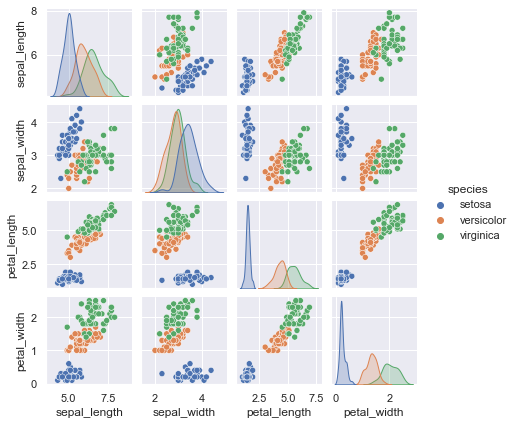

In [7]:
# visualizing the data
%matplotlib inline
sns.set()
sns.pairplot(iris, hue = 'species', height=1.5) #size parameter is renamed as height

In [8]:
# Extracting features matrix and target array
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [9]:
y_iris = iris['species']
y_iris.shape

(150,)

### Supervised Learning example: Simple linear regression

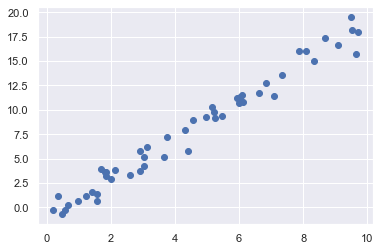

In [10]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y)

In [16]:
# choose a class of model: LinearRegression
from sklearn.linear_model import LinearRegression

# choose model hyperparamters: 
model = LinearRegression(fit_intercept = True) # WE want to fit the intercept

# Feature matrix and target vector
X = x[:, np.newaxis]

# Fit the model to your data
model.fit(X,y)

LinearRegression()

In [17]:
model.coef_

array([1.9776566])

In [18]:
model.intercept_

-0.9033107255311164

In [27]:
#predicting labels for unknown data
xfit = np.linspace(-1,11)
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

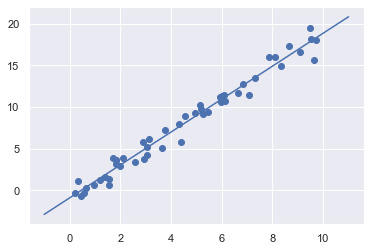

In [29]:
# Visualizing the results
plt.scatter(x,y)
plt.plot(xfit,yfit)

### Supervised learning example: Iris Classification

In [32]:
# using GaussianNB
#use model_selction instead of cross_validation
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [34]:
#choose a model
from sklearn.naive_bayes import GaussianNB
#instantiate mode
model = GaussianNB()
#fit the model to data
model.fit(Xtrain,ytrain)
#prediction
y_model = model.predict(Xtest)

#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised Learning example: Iris dimensionality
We will use principle Component Analysis. The data has four features but we will ask the model to return two dimensional representation of data.

In [35]:
from sklearn.decomposition import PCA # 1. choose the model class
model = PCA(n_components = 2) #instantiate the model with hyperparameters
model.fit(X_iris) #fit to data, notice the label y is not specified
X_2D = model.transform(X_iris) #transofrm the data to two dimension

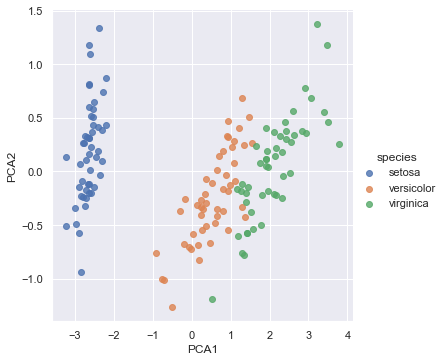

In [39]:
# plotting the data
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1","PCA2",hue='species', data=iris, fit_reg=False)

### Unsupervised learning: Iris Clustering
Using GAussian Mixture Model method.

In [42]:
from sklearn.mixture import GaussianMixture as GMM # choose the model
model = GMM(n_components=3, covariance_type ='full') #instantiate the model with hyperparameters
model.fit(X_iris) # fit to data without any labels
y_gmm = model.predict(X_iris) # Determine cluster labels

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


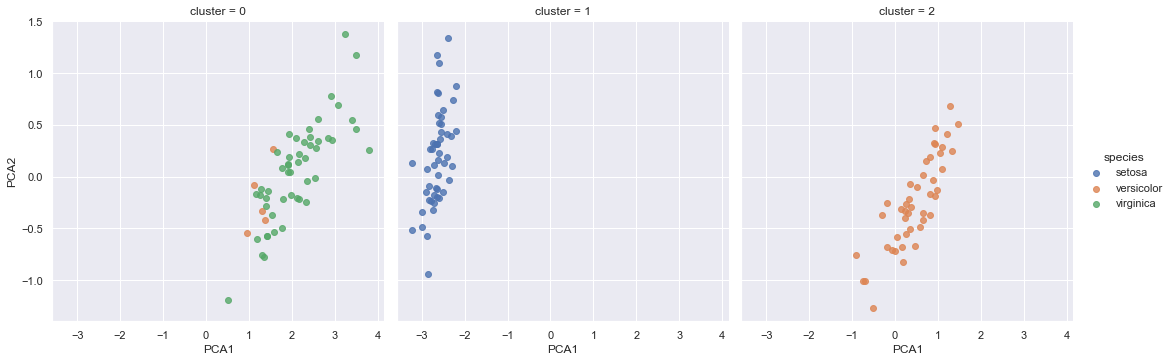

In [44]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", hue='species', col='cluster', data=iris, fit_reg=False)

## Application: Exploring Hand-Written Digits

In [45]:
# Loading and Visualizing the digits data
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

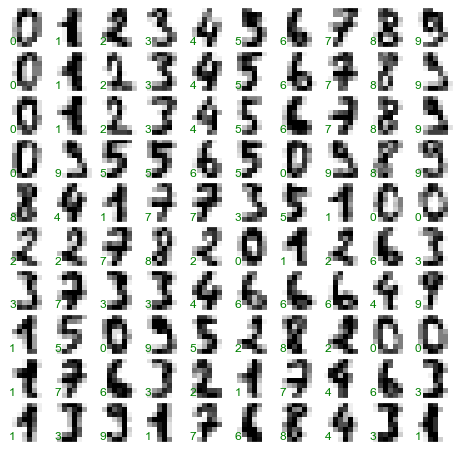

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10,10, figsize=(8,8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

In [51]:
X = digits.data
X.shape

(1797, 64)

In [52]:
y = digits.target
y.shape

(1797,)

In [53]:
# Unsupervised learning: Dimensionality reduction
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

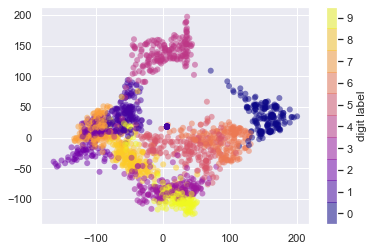

In [60]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('plasma', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [61]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(89.18, 0.5, 'true value')

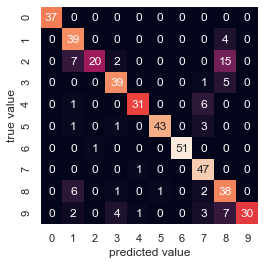

In [65]:
# confusion matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest,y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

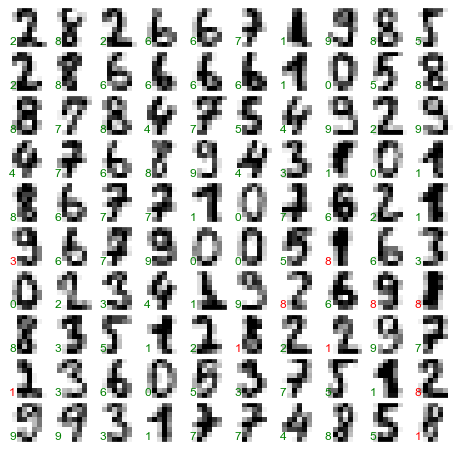

In [66]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')